In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import os.path

In [7]:
#reading all files.
dfWineQ=pd.read_csv('winequality-red.csv', delimiter=';')
dfParkinson = pd.read_csv('parkinsons_updrs.data', delimiter=',')
dfAirline = pd.read_csv("airq402.data", delimiter=r"\s+")
dfAirline.columns = ['city1', 'city2', 'avg_Fare', 'distance', 'avg_weekly_passengers', 'market_leading', 'market_share', 
                       'avg_fare', 'low_priceair','market share','price']

In [11]:
# 1.
# After analyzing datasets we can say that following columns need to be converted
# to numeric using pandas.get_dummies.
colChange = [ 'city1', 'city2', 'low_priceair', 'market_leading']
dfAirlineDummy = pd.get_dummies(dfAirline, columns = colChange)

In [21]:
#2.
naCheckWineQ = dfWineQ[dfWineQ.isnull().any(1)]
naCheckParkinson = dfParkinson[dfParkinson.isnull().any(1)]
naCheckAirline = dfAirlineDummy[dfAirlineDummy.isnull().any(1)]

print(len(naCheckWineQ))
print(len(naCheckParkinson))
print(len(naCheckAirline))

# As we can see that there are 0 rows having NA or missing values so there is no need to drop any data.

0
0
0


In [87]:
#3. Following function will split a dataframe in 80 train and 20 test data. 
def split_Xdataset(dfToSplit):
    cutoff = int(len(dfToSplit) * 0.8)
    trainSetX = dfToSplit.iloc[:cutoff,:]
    testSetX = dfToSplit.iloc[cutoff:,:]
    return trainSetX, testSetX

def split_Ydataset(dfToSplit, colName):
    tr = np.array(dfToSplit[colName]).T
    cutoff = int(len(dfToSplit) * 0.8)
    trainSetY = tr[0:cutoff]
    testSetY = tr[cutoff:]
    return trainSetY, testSetY

def minGD(stepSize, xTrain, xTest, yTrain, yTest, numIter, heading):
    betaList = np.zeros(xTrain.shape[1])
    resList = []
    rmseList = []
    for i in range(numIter):
        loss = yTrain - np.matmul(xTrain, betaList)
        betaList = betaList - stepSize * (-2 * np.matmul(xTrain.T, loss))
        loss2 = np.sum(np.square(yTrain - np.matmul(xTrain, betaList)))
        resList.append(np.abs(loss2 - np.sum(np.square(loss))))
        rmseList.append(np.sqrt(np.mean((yTest - np.matmul(xTest, betaList))**2)))

    diag, axes = plt.subplots(1, 2, figsize = (16,10))
    axes[0].set_title(heading)
    axes[0].set(xlabel = 'Iterations (i)', ylabel = 'f(xi - 1) - f(xi)')
    axes[0].plot(resList, 'blue')
    
    axes[1].set_title(heading)
    axes[1].set(xlabel = 'Iterations (i)', ylabel = 'RMSE')
    axes[1].plot(rmseList, 'red')
    
    return
    
    

    


<b> Wine DATASET</b>
<p> IMAX is 500, stepsize = 0.0000002</p>

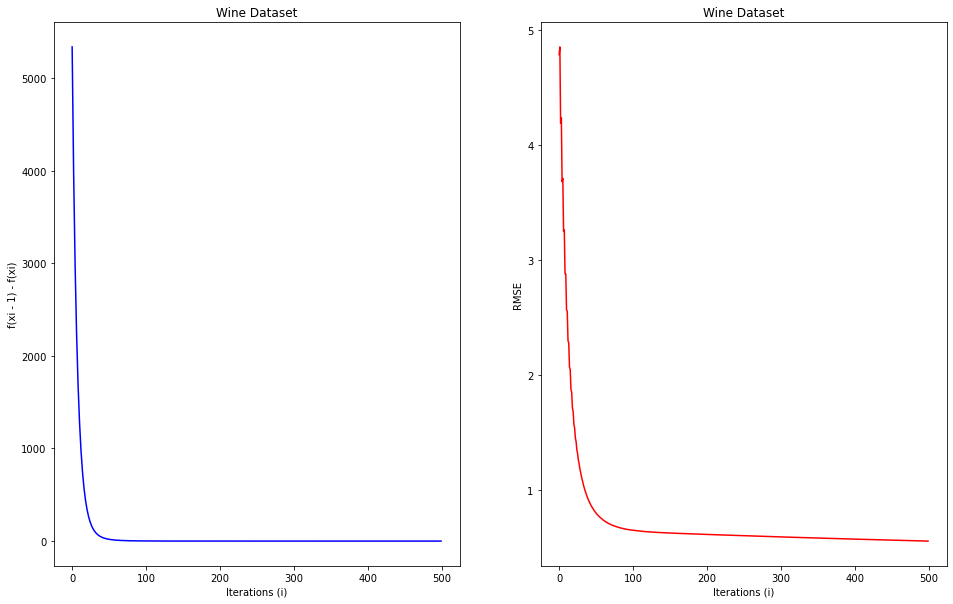

In [153]:
#4.
tempTrainXWine, tempTestXWine = split_Xdataset(dfWineQ)
tempTrainYWine, tempTestYWine = split_Ydataset(dfWineQ, 'quality')

stepSize = 0.0000002
imax = 500
minGD(stepSize, tempTrainXWine, tempTestXWine, tempTrainYWine, tempTestYWine, imax, 'Wine Dataset')

<p>IMAX is 500, stepSize = 0.00000002</p>

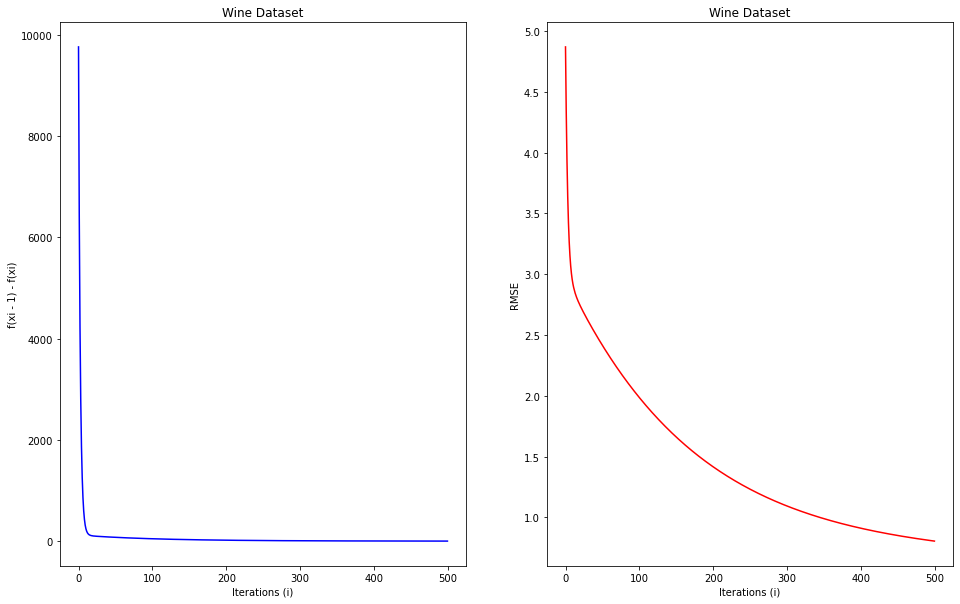

In [154]:
stepSize = 0.00000002
imax = 500
minGD(stepSize, tempTrainXWine, tempTestXWine, tempTrainYWine, tempTestYWine, imax, 'Wine Dataset')

<p>IMAX is 500, stepSize = 0.000002</p>

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-87-3f6109e6fb26>:23: RuntimeWarning: invalid value encountered in double_scalars
  resList.append(np.abs(loss2 - np.sum(np.square(loss))))


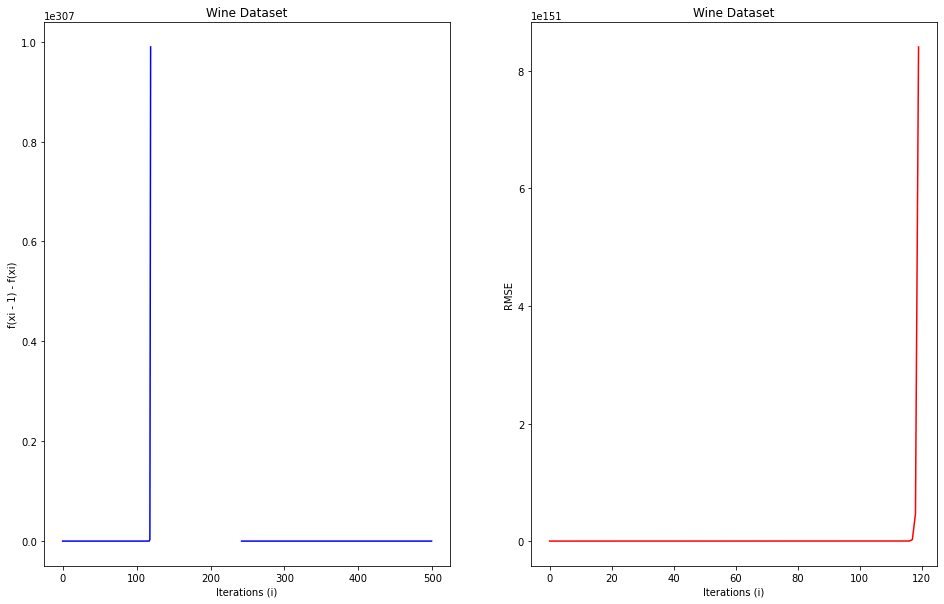

In [155]:
stepSize = 0.000002
imax = 500
minGD(stepSize, tempTrainXWine, tempTestXWine, tempTrainYWine, tempTestYWine, imax, 'Wine Dataset')

<p>As we can see from above graphs that abs(f(xi -1) - f(xi)) is decreasing and converges quickly when we have big step size such as 0.0000002 as compare to smaller step size of 0.000000002. Similar scenario can be seen with RMSE plot. But in our second scenario when we increased step size to 0.000002 it started to diverge.</p>

<b>Airline DATASET</b>
<p> IMAX is 50, stepSize = 0.00000000005 </p>

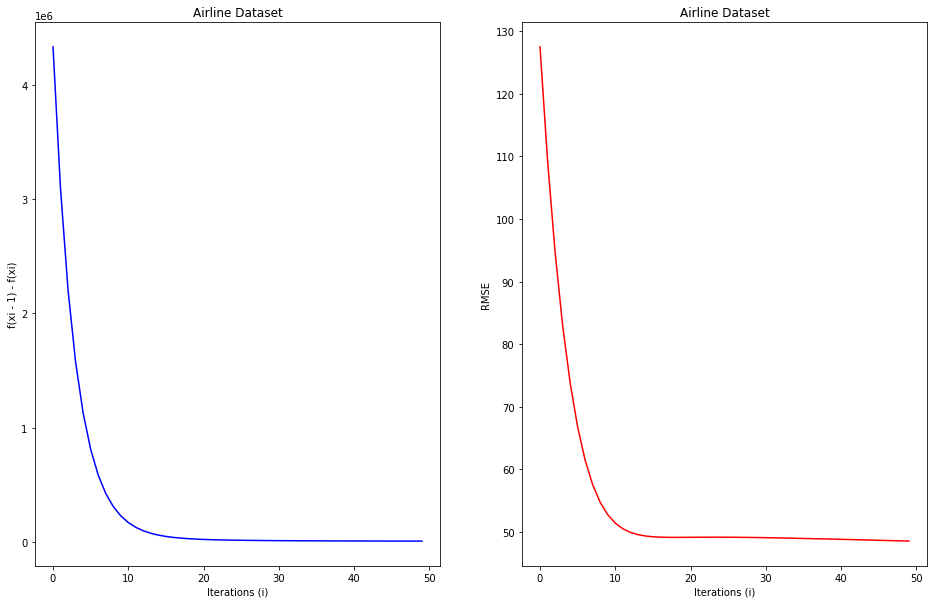

In [157]:
#4.
tempTrainXAirline, tempTestXAirline = split_Xdataset(dfAirlineDummy)
tempTrainYAirline, tempTestYAirline = split_Ydataset(dfAirlineDummy, 'price')

stepSize = 0.00000000005
imax = 50
minGD(stepSize, tempTrainXAirline, tempTestXAirline, tempTrainYAirline, tempTestYAirline, imax, 'Airline Dataset')

<p>IMAX is 50, stepSize = 0.000000001</p>

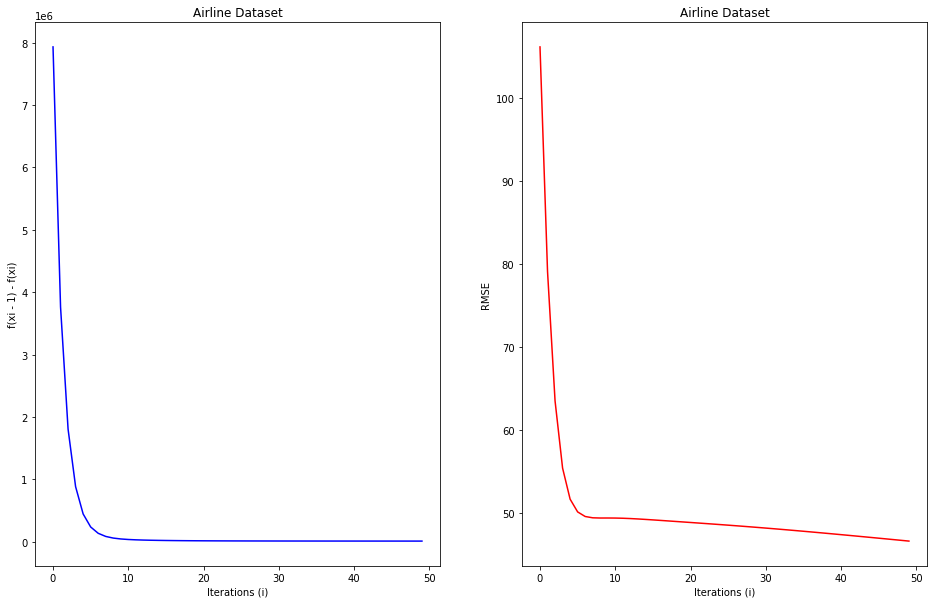

In [158]:
stepSize = 0.0000000001
imax = 50
minGD(stepSize, tempTrainXAirline, tempTestXAirline, tempTrainYAirline, tempTestYAirline, imax, 'Airline Dataset')

<p>IMAX is 50, stepSize = 0.000000001</p>

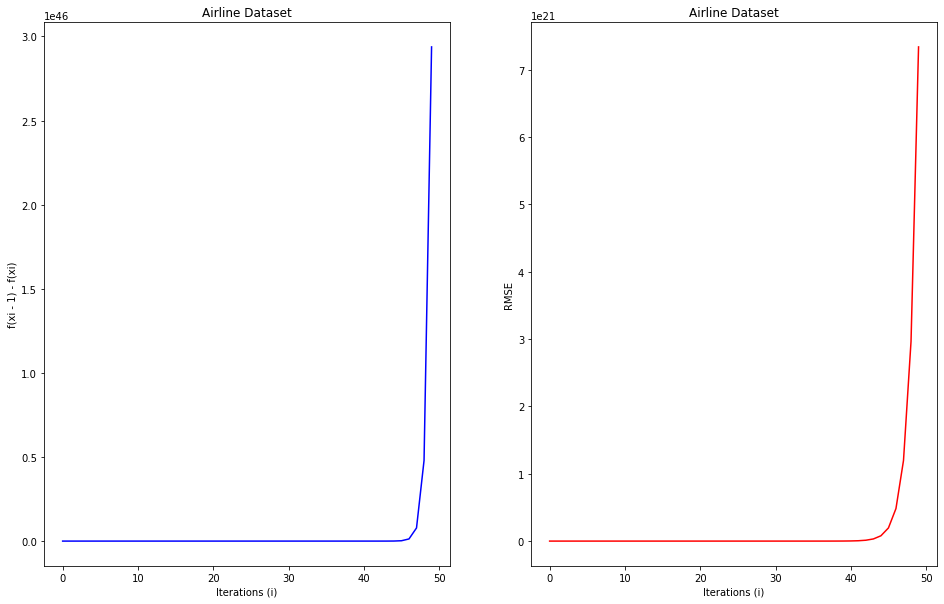

In [159]:
stepSize = 0.0000000011
imax = 50
minGD(stepSize, tempTrainXAirline, tempTestXAirline, tempTrainYAirline, tempTestYAirline, imax, 'Airline Dataset')

<p>As we can see from above graphs that abs(f(xi -1) - f(xi)) is decreasing and converges quickly when we have big step size such as 0.0000000001 as compare to smaller step size of 0.00000000005. Similar scenario can be seen with RMSE plot. But in our last scenario when we increased step size to 0.0000000011 it started to diverge after 45 iterations.</p>

<b> Parkinson DATASET</b>
<p> imax = 500, stepSize = 0.00000001</p>

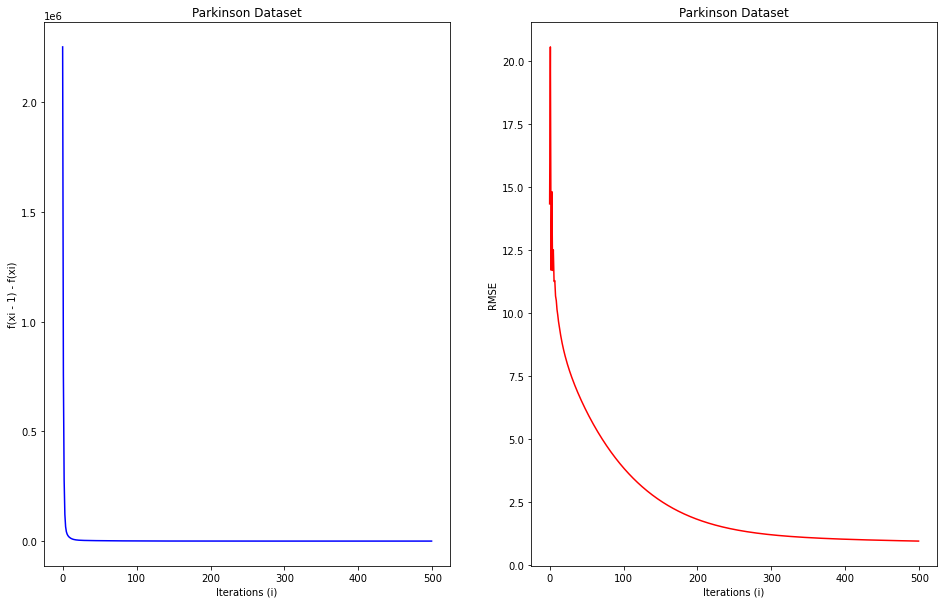

In [160]:
tempTrainXParkinson, tempTestXParkinson = split_Xdataset(dfParkinson)
tempTrainYParkinson, tempTestYParkinson = split_Ydataset(dfParkinson, 'total_UPDRS')

stepSize = 0.00000001
imax = 500
minGD(stepSize, tempTrainXParkinson, tempTestXParkinson, tempTrainYParkinson, tempTestYParkinson, imax, 'Parkinson Dataset')

<p> imax = 500, stepSize = 0.000000001</p>

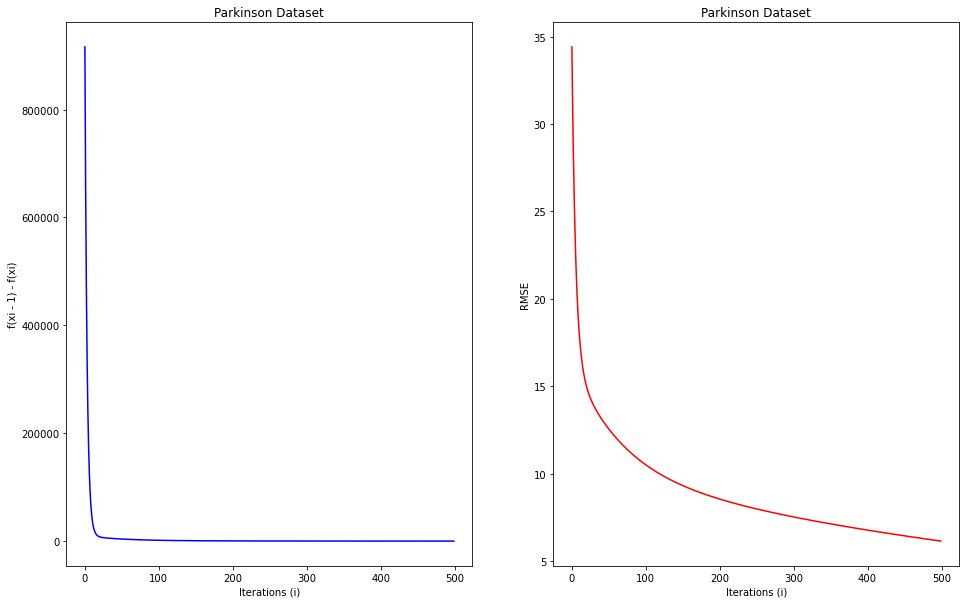

In [161]:
stepSize = 0.000000001
imax = 500
minGD(stepSize, tempTrainXParkinson, tempTestXParkinson, tempTrainYParkinson, tempTestYParkinson, imax, 'Parkinson Dataset')

<p> imax = 500, stepSize = 0.0000000001</p>

<ipython-input-87-3f6109e6fb26>:23: RuntimeWarning: invalid value encountered in double_scalars
  resList.append(np.abs(loss2 - np.sum(np.square(loss))))


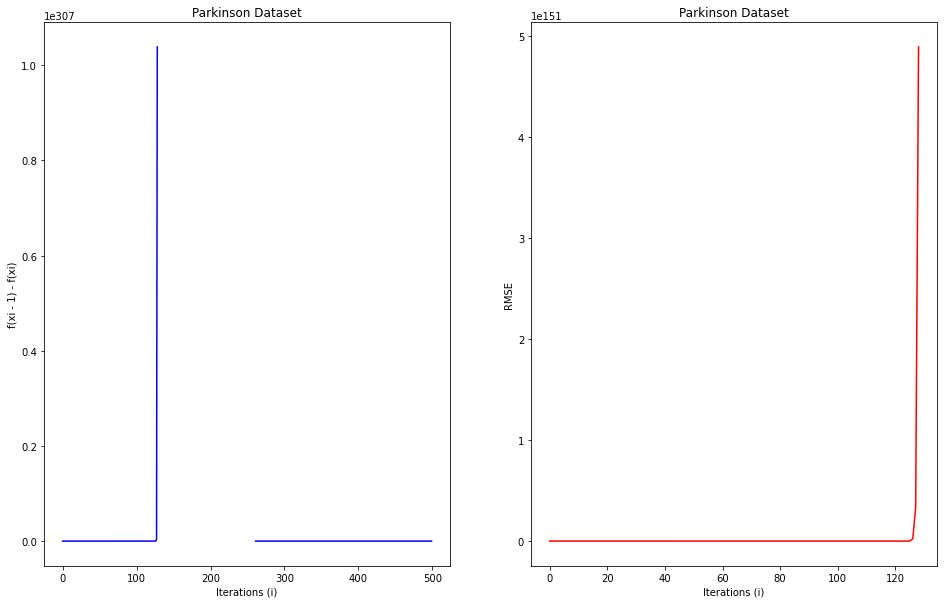

In [162]:
stepSize = 0.0000001
imax = 500
minGD(stepSize, tempTrainXParkinson, tempTestXParkinson, tempTrainYParkinson, tempTestYParkinson, imax, 'Parkinson Dataset')

<p>As we can see from above graphs that abs(f(xi -1) - f(xi)) is decreasing and converges quickly when we have big step size such as 0.00000001 as compare to smaller step size of 0.000000001. Similar scenario can be seen with RMSE plot. But in our last scenario when we increased step size to 0.0000001 it started to diverge</p>

<b> Exercise 3: </b>

In [163]:
#1.
def lossFunc(betaList, xTrain, yTrain): #loss function
    yPred = np.matmul(xTrain,betaList)
    loss = np.matmul((yTrain - yPred).T, (yTrain - yPred))
    return loss

def lossFuncD(betaList, xTrain, yTrain): #loss function derivative
    loss = -2 * np.matmul(xTrain.T, yTrain - np.matmul(xTrain, betaList))
    return loss

def stepLengthBacktrack(betaList, xTrain, yTrain):

    stepSize = 0.1
    B = 0.5
    mu = 1
    
    while (lossFunc(betaList, xTrain, yTrain) - 
           lossFunc(betaList + (mu * -1 * lossFuncD(betaList, xTrain, yTrain)), xTrain, yTrain)) < (stepSize * mu * np.matmul(lossFuncD(betaList, xTrain, yTrain).T, lossFuncD(betaList, xTrain, yTrain))):
        mu = mu * B
    return mu

#Here we are re-using our minGD function with some minor tweaks to integrate backtrack algo
def minGD_backTrack(xTrain, xTest, yTrain, yTest, numIter, title):
    betaList = np.zeros((xTrain.shape[1]))
    loss2 = yTrain - np.matmul(xTrain, betaList)
    resList = []
    rmseList = []
    for i in range(numIter): 
        mu = stepLengthBacktrack(betaList, xTrain, yTrain)
        loss = yTrain - np.matmul(xTrain, betaList)
        betaList = betaList - mu * (-2 * np.matmul(xTrain.T, loss))
        loss2 = np.sum(np.square(yTrain - np.matmul(xTrain, betaList)))
        resList.append(np.abs(loss2 - np.sum(np.square(loss))))
        rmseList.append(np.sqrt(np.mean((yTest - np.matmul(xTest, betaList))**2) / len(xTrain)))
        
        if np.abs(loss2 - np.sum(np.square(loss))) < 0.1:
            break
            
    diag, axes = plt.subplots(1, 2, figsize=(16,10))
    
    axes[0].set_title(title)
    axes[0].set(xlabel='Iterations', ylabel='f(xi−1) − f(xi)')
    axes[0].plot(resList, 'blue')

    axes[1].set_title(title)
    axes[1].set(xlabel='No of Iterations', ylabel='RMSE')
    axes[1].plot(rmseList, 'red')
    return

#2.
def boldDriver(beta, xTrain, yTrain, alpha1, alpha2, alpha3):
    alpha = alpha1 * alpha2
    while (lossFunc(beta, xTrain, yTrain) - 
           lossFunc(beta + (alpha * -1 * lossFuncD(beta, xTrain, yTrain)), xTrain, yTrain) <= 0):
        alpha = alpha * alpha3
    return alpha

def minGD_boldDriver(xTrain, xTest, yTrain, yTest, numIter, title):
    betaList = np.zeros((xTrain.shape[1]))
    loss2 = yTrain - np.matmul(xTrain, betaList)
    resList = []
    rmseList = []
    for i in range(numIter): 
        alpha = boldDriver(betaList, xTrain, yTrain, 1, 1.1, 0.5)
        loss = yTrain - np.matmul(xTrain, betaList)
        betaList = betaList - alpha * (-2 * np.matmul(xTrain.T, loss))
        loss2 = np.sum(np.square(yTrain - np.matmul(xTrain, betaList)))
        resList.append(np.abs(loss2 - np.sum(np.square(loss))))
        rmseList.append(np.sqrt(np.mean((yTest - np.matmul(xTest, betaList))**2) / len(xTrain)))
        
        if np.abs(loss2 - np.sum(np.square(loss))) < 0.1:
            break
            
    diag, axes = plt.subplots(1, 2, figsize=(16,10))
    
    axes[0].set_title(title)
    axes[0].set(xlabel='Iterations', ylabel='f(xi−1) − f(xi)')
    axes[0].plot(resList, 'blue')

    axes[1].set_title(title)
    axes[1].set(xlabel='No of Iterations', ylabel='RMSE')
    axes[1].plot(rmseList, 'red')
    return

<b> Wine DATASET : </b>
<p>StepLengthBackTrack and StepLengthBoldDriver</p>

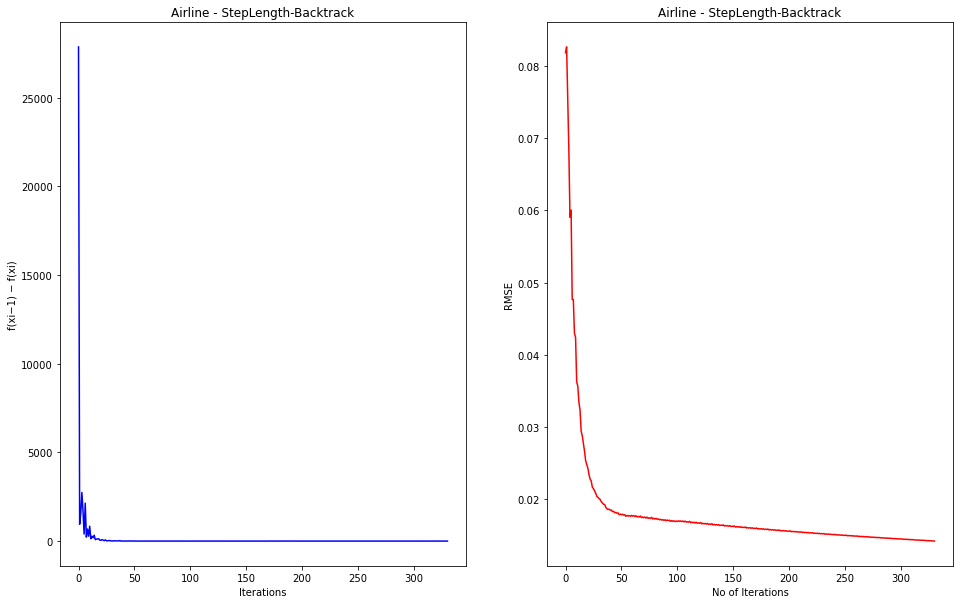

In [167]:
minGD_backTrack(tempTrainXWineine, tempTestXWine, tempTrainYWine, tempTestYWine, 500, 'Airline - StepLength-Backtrack')

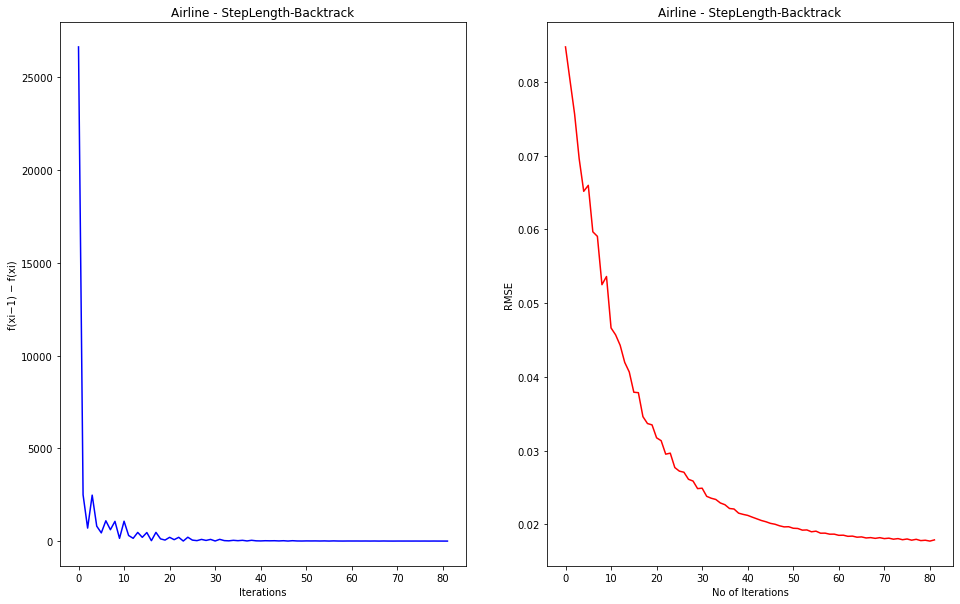

In [168]:
minGD_boldDriver(tempTrainXWine, tempTestXWine, tempTrainYWine, tempTestYWine, 500, 'Airline - StepLength-Backtrack')

<p>As we can see from both graphs of StepLengthBackTrack and StepLengthBoldDriver, the convergence for Wine Dataset for both abs(f(xi - 1) - f(xi)) and RMSE occurs quickly in less number of iterations with StepLengthBoldDriver</p

<b> Airline DATASET : </b>
<p>StepLengthBackTrack and StepLengthBoldDriver</p>

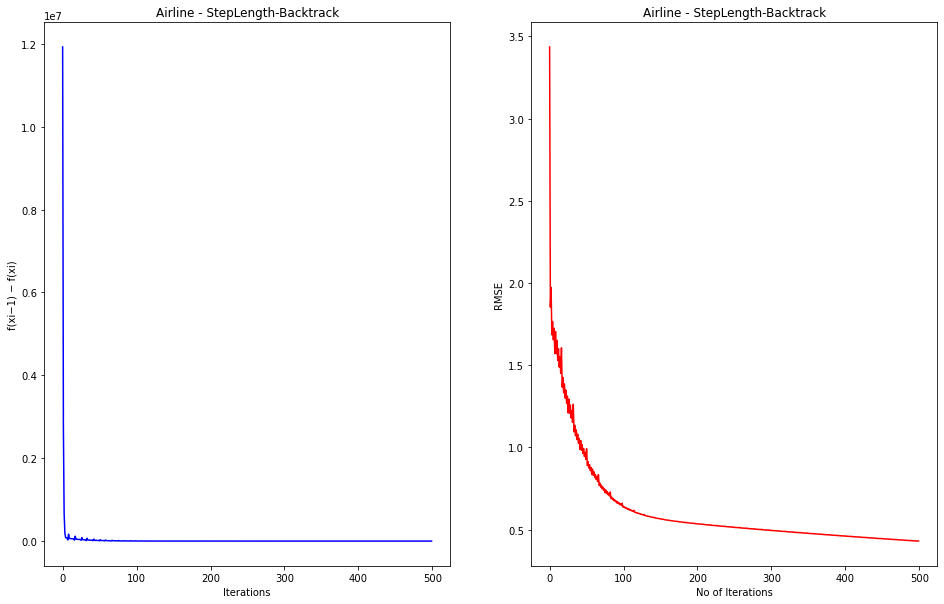

In [166]:
minGD_backTrack(tempTrainXAirline, tempTestXAirline, tempTrainYAirline, tempTestYAirline, 500, 'Airline - StepLength-Backtrack')

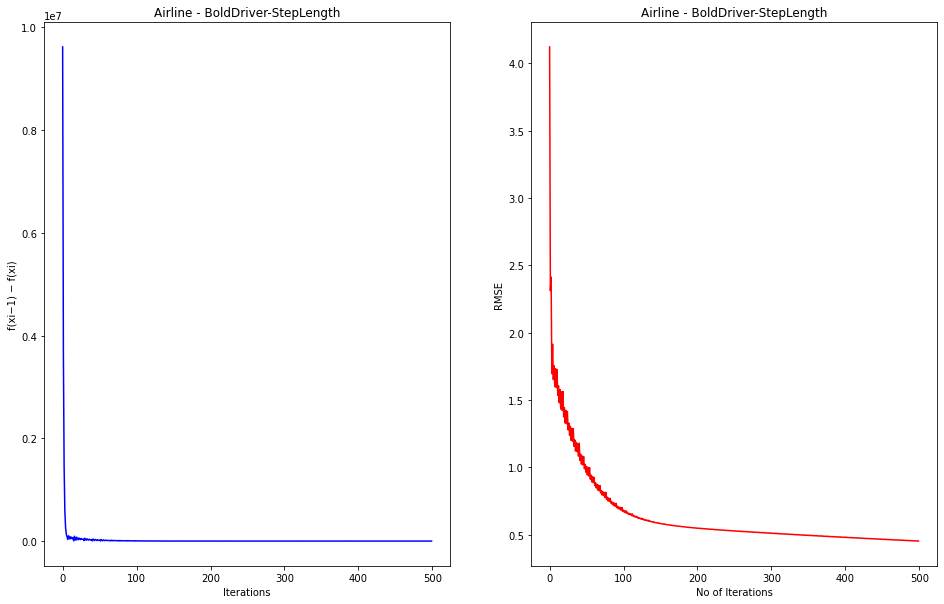

In [171]:
minGD_boldDriver(tempTrainXAirline, tempTestXAirline, tempTrainYAirline, tempTestYAirline, 500, 'Airline - BoldDriver-StepLength')

<p>As we can see from both graphs of StepLengthBackTrack and StepLengthBoldDriver, the convergence of Airplane Dataset for both abs(f(xi - 1) - f(xi)) and RMSE occurs mostly same but it is a bit quicker in case of StepLengthBoldDriver</p>

<b> Parkinson DATASET : </b>
<p>StepLengthBackTrack and StepLengthBoldDriver</p>

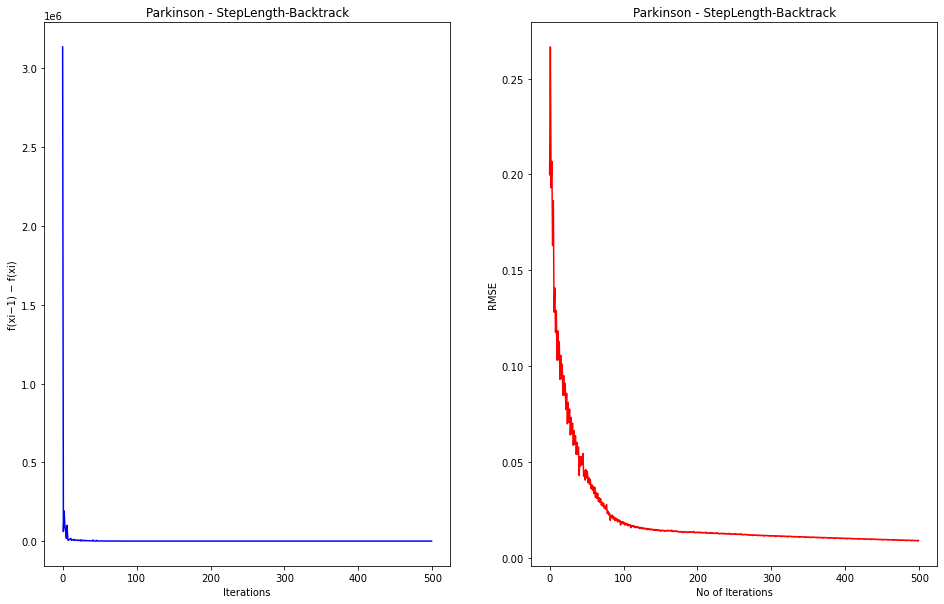

In [169]:
minGD_backTrack(tempTrainXParkinson, tempTestXParkinson, tempTrainYParkinson, tempTestYParkinson, 500, 'Parkinson - StepLength-Backtrack')

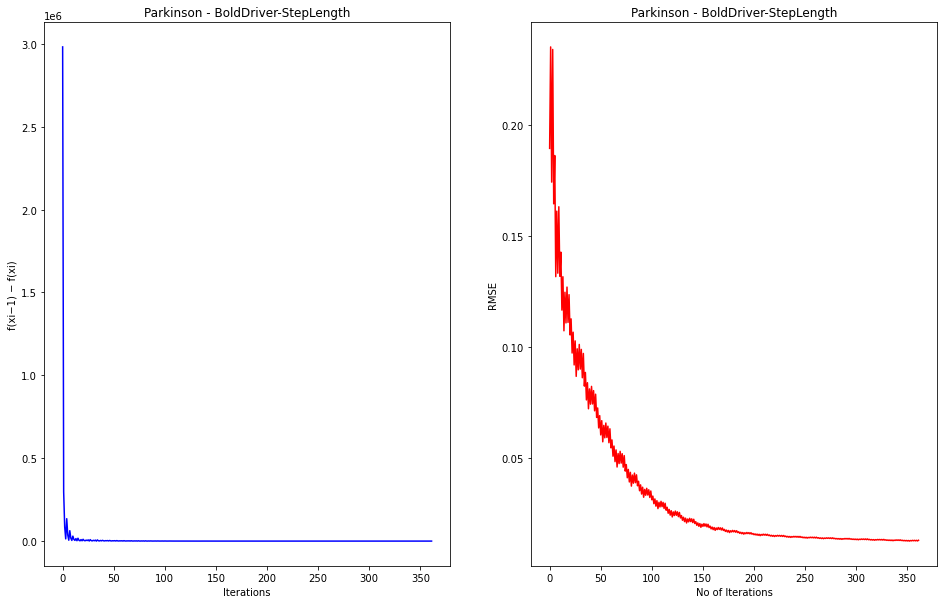

In [170]:
minGD_boldDriver(tempTrainXParkinson, tempTestXParkinson, tempTrainYParkinson, tempTestYParkinson, 500, 'Parkinson - BoldDriver-StepLength')

<p>As we can see from both graphs of StepLengthBackTrack and StepLengthBoldDriver, the convergence of Parkinson Dataset for both abs(f(xi - 1) - f(xi)) and RMSE occurs quickly in less number of iterations with StepLengthBoldDriver</p>